# Prototype Dataset
This file generates the path-to-path dataset to train a prototype transformer

The input output sequence of a logo should consist of 270 Parameters
- DeepSVG Embedding (256)
- a0 Type "EOS" (1)
- a1 - a6 Type (6)
- a7 - a12 Param (6)
- a13 time offset from beginning of animation in seconds

Input Sequence
- In the input sequence, the last 13 Parameters are set to zero
- In a final model, these parameters are aimed to be left out (as context vector isn't based on that)

Output Sequence
- The Output sequence consists of the selected paths represented by their DeepSVG Embedding
- The Animation is represented through the type and the parameters.
- Each output sequence ends with an EOS Token, where the EOS-type in the one-hot-encoded part is set to 1.

## Creating the input data

In [1]:
import pandas as pd
import firebase_admin
from firebase_admin import credentials, firestore

# Initialize Firebase Admin SDK with your service account credentials
cred = credentials.Certificate("rate-logos-firebase-adminsdk-9tvce-74b6eadb1d.json")
firebase_admin.initialize_app(cred)

# Create a reference to the Firestore database
db = firestore.client()

# Reference to your Firestore collection
collection_ref = db.collection("animations_new")

# Get documents from the collection
documents = collection_ref.stream()

# Create a list to store data
data = []

# Iterate over documents and extract data
for doc in documents:
    data.append(doc.to_dict())

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Display the DataFrame
print(df)
df.to_csv('data/ratings/test_rating.csv', index=False)

      rating alias       filename    id                             time  \
0          4           logo_0.svg     0 2024-02-28 20:37:35.310000+00:00   
1          0        logo_3555.svg     1 2024-02-28 20:38:55.975000+00:00   
2          0        logo_4597.svg    10 2024-02-28 20:40:17.609000+00:00   
3          0         logo_975.svg   100 2024-02-28 22:35:09.303000+00:00   
4          0        logo_3578.svg  1000 2024-03-01 11:13:04.844000+00:00   
...      ...   ...            ...   ...                              ...   
3025       0        logo_3952.svg   995 2024-03-01 11:12:41.487000+00:00   
3026       0         logo_970.svg   996 2024-03-01 11:12:44.772000+00:00   
3027       0        logo_4944.svg   997 2024-03-01 11:12:48.294000+00:00   
3028       0         logo_149.svg   998 2024-03-01 11:12:53.969000+00:00   
3029       2        logo_3066.svg   999 2024-03-01 11:13:00.958000+00:00   

                                                   data  
0     0,0,0,1,0,0,0,0,0,0,0,0

In [2]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import os
import requests

file_path = 'data/5_svg_embedding/svg_embedding_5000.pkl'

# Open the pickle file for reading in binary mode
with open(file_path, 'rb') as file:
    # Load the data from the pickle file
    data = pickle.load(file)

#filtered_data = pd.read_csv("data/animated_svgs_dataframes/firebase_animations.csv", sep=";").rename(columns={"filename":"file", "rating" : "label"})
#data["filename"]=data["filename"].str.replace(".svg","")
#test = pd.merge(data, filtered_data, left_on="filename", right_on="file", how="inner")

print(data)

   animation_id         0         1         2         3         4         5  \
0             0 -1.479738  1.499942 -0.460764  0.363093 -0.947988 -1.115443   
1             1 -0.198556  0.946851  0.497889 -0.779701 -0.070278 -0.871111   
2             3  0.141129  1.822560  0.397646  0.658561 -1.421428 -1.602260   
3             2  0.989437  0.265804  2.549353  0.695821 -0.884729 -0.079115   
4             5 -0.157587  0.536932  0.361361 -0.021343 -0.385152  0.616863   
..          ...       ...       ...       ...       ...       ...       ...   
4             6 -0.187661  0.401433 -0.100404  0.636203 -0.474901  1.383271   
5             7  0.877559 -1.188825  1.372045 -0.126786 -0.186506 -0.021710   
6             5 -0.833903  0.496440  0.277829  0.364739 -1.040107  0.297266   
7             4 -0.400199  0.921548  0.191972  0.333160 -1.018423 -1.097480   
8             8  0.877559 -1.188825  1.372045 -0.126786 -0.186506 -0.021710   

           6         7         8  ...       247    

In [3]:
# checking the number of paths 

data['filename'].value_counts()
data["filename"]=data["filename"].str.replace(".svg","")

C:\Users\okan2\AppData\Local\Temp\ipykernel_35056\3690324963.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  data["filename"]=data["filename"].str.replace(".svg","")


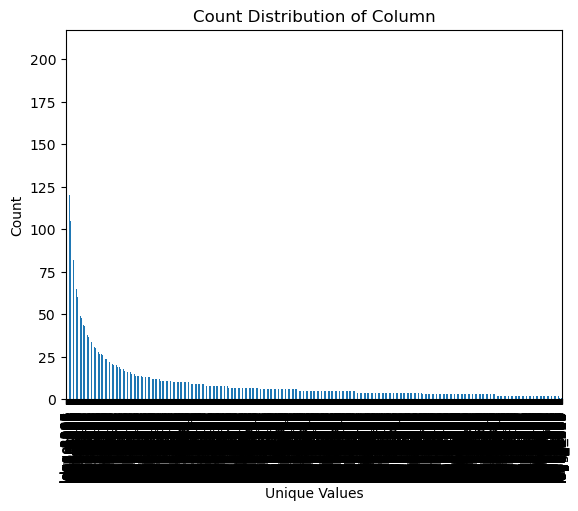

In [4]:
count_distribution = data['filename'].value_counts()
count_distribution.plot(kind='bar')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.title('Count Distribution of Column')
plt.show()

In [5]:
plt.hist(data['filename'], bins=20)  # You can adjust the number of bins as needed
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.title('Count Distribution of Column')
plt.show()

In [ ]:
# max number of paths in one logo
data['filename'].value_counts().iloc[0]

In [ ]:
data[data['filename']=='logo_36']

In [ ]:
#type(data['animation_id'][118])

In [ ]:
# Read CSV into DataFrame
df = pd.read_csv('data/ratings/test_rating.csv')

df['id'] = df.index

# separating to rating and animation
animation_df = df[['id','filename','data', "rating"]]

rating_df = df[['id','filename','rating']]


In [ ]:
animation_df

In [ ]:
# changing the structure of rating data 

# Split the 'data' column and explode
animation_df['data'] = animation_df['data'].str.rstrip(';').str.split(';')
animation_df = animation_df.explode('data').dropna()

# Reset the index
animation_df.reset_index(drop=True, inplace=True)

# separating the animation ids and animation params
animation_df[['animation_id','a_0','a_1','a_2','a_3','a_4','a_5','a_6','a_7','a_8','a_9',
           'a_10','a_11','a_12','a_13','a_14','a_15','a_16','a_17','a_18','a_19','a_20','a_21',
           'a_22','a_23','a_24','a_25']] = animation_df['data'].str.split(',', expand=True)

animation_df[['animation_id']] = animation_df[['animation_id']].astype(int)

animation_df[['a_0','a_1','a_2','a_3','a_4','a_5','a_6','a_7','a_8','a_9',
           'a_10','a_11','a_12','a_13','a_14','a_15','a_16','a_17','a_18','a_19','a_20','a_21',
           'a_22','a_23','a_24','a_25']] = animation_df[['a_0','a_1','a_2','a_3','a_4','a_5','a_6','a_7','a_8','a_9',
           'a_10','a_11','a_12','a_13','a_14','a_15','a_16','a_17','a_18','a_19','a_20','a_21',
           'a_22','a_23','a_24','a_25']].astype(float)

# Create a new column with concatenated values from each row
animation_df['model_output'] = animation_df[['a_0','a_1','a_2','a_3','a_4','a_5','a_6','a_7','a_8','a_9',
           'a_10','a_11','a_12','a_13','a_14','a_15','a_16','a_17','a_18','a_19','a_20','a_21',
           'a_22','a_23','a_24','a_25']].apply(lambda row: list(row), axis=1)

animation_df.drop(columns=['data','a_0','a_1','a_2','a_3','a_4','a_5','a_6','a_7','a_8','a_9',
           'a_10','a_11','a_12','a_13','a_14','a_15','a_16','a_17','a_18','a_19','a_20','a_21',
           'a_22','a_23','a_24','a_25'], inplace=True)

animation_df.to_csv("data/animated_svgs_dataframes/firebase_animations.csv", sep=";")
animation_df["model_output"] = list(animation_df["model_output"])
animation_df["model_output"]

## PROTOTYPE DATASET START

## Import DeepSVG Embedding

In [ ]:
import pickle

import torch

with open("data/5_svg_embedding/svg_embedding_5000.pkl", "rb") as f:
    deepsvg_embedding = pickle.load(f)
deepsvg_embedding["filename"] = deepsvg_embedding["filename"].str.replace(".svg","")

In [ ]:
## duplicate for further use
embeddings = deepsvg_embedding.copy() #for output sequences
input_sequences = deepsvg_embedding
embeddings.head()

In [ ]:
embeddings['animation_id'] = embeddings['animation_id'].astype(int)
embeddings.head()

## Train / Test Split

### Logo Dataset Analysis
Most logos have only a few paths
Some logos have over 100 paths to animate

In [ ]:
# Might not execute
# input_sequences['filename'].value_counts().hist(bins=100)

### Stratify on Number of Paths in Logo

In [ ]:
# Count occurrences
logos = input_sequences.groupby('filename').size().reset_index(name='count')

# To stratify later, categorize the sizes
bins = 20
quantiles = [(i+1)/bins for i in range(bins)]
print(quantiles)

percentiles = logos['count'].quantile(quantiles)
print(percentiles)

# Function to categorize based on quantiles
def categorize_count(count):
    for i, percentile in enumerate(percentiles):
        if count <= percentile:
            return f"Quantile {i}"
    return f"Quantile {len(quantiles)}"

# Apply the categorization function to create a new column
logos['count_category'] = logos['count'].apply(categorize_count)
logos['count_category'].value_counts()

### Train / Test split

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Split the DataFrame into training and testing sets, stratifying on 'count_category'
logos_train, logos_test = train_test_split(logos, test_size=0.2, stratify=logos['count_category'], random_state=42)

The distributions of lenghts are now similar. Outliers with a long sequence are in both datasets

In [ ]:
logos_train['count'].hist(bins=100)

In [ ]:
logos_test['count'].hist(bins=100)

In [ ]:
logos_test = logos_test['filename'].unique()
logos_train = logos_train['filename'].unique()
logos_test

### Discussion
- One might also stratify over used animation types.
- Are there enough good animations in the dataset for logos with lots of paths? -> Manual annotation

## Animation Dataset

In [ ]:
import pickle
import pandas as pd

# Load the pickle file
with open("data/surrogate_model/animation_label.pkl", "rb") as f:
    imported_pickle = pickle.load(f)

# Create a DataFrame from the imported data
filtered_data = pd.DataFrame(imported_pickle, columns=["file", "animation_id", "model_output", "label"])

filtered_data = pd.read_csv("data/animated_svgs_dataframes/firebase_animations.csv", sep=";").rename(columns={"filename":"file", "rating" : "label"})

# Define the mapping for ratings
#mapping_dict = {"Very Good": 6, "Good": 5, "Okay": 4, "Bad": 3, "Very Bad": 2, "no_rating": 1}
# Replace the 'label' column with the corresponding ratings using .map
#filtered_data['rating'] = filtered_data['label'].map(mapping_dict)
filtered_data['rating'] = filtered_data['label']

filtered_data["file"] = filtered_data["file"].str.replace(".svg","")
# Extract unique logos by splitting 'file' with "_animation" and using .str.get(0)
#logos_unique = filtered_data['file'].str.split('_animation').str.get(0).unique()

In [ ]:
#example
filtered_data[filtered_data["file"].str.contains("logo_5")]

### Consistency: Delete twice animated paths in one animation
Every animation should animate each path only once. **But there are duplicates.**
Some duplicates are completely equal.

In [ ]:
# Example
filtered_data[filtered_data['file'] == "logo_379_animation_5"]
filtered_data.head()

In [ ]:
# SIMPLE DUPLICATE REDUCTION
print(f"There are {filtered_data.duplicated(subset=['file', 'animation_id'], keep=False).sum()} duplicates.")

# Create a copy for and convert numpy to strings
duplicate_search = filtered_data.copy()
duplicate_search['model_output'] = duplicate_search['model_output'].apply(lambda x: str(x))

# Find duplicates in the copy and remove with a mask
duplicates_mask = duplicate_search.duplicated(keep='first')
filtered_data = filtered_data[~duplicates_mask]

filtered_data = filtered_data.drop_duplicates()
print(f"Reduced to {filtered_data.duplicated(subset=['file', 'animation_id'], keep=False).sum()} duplicates.")

But there are some more duplicates. Some have different ratings, so let's simply keep the better rating:

In [ ]:
duplicates_mask = filtered_data.duplicated(subset=['file', 'animation_id'], keep=False)
filtered_data[duplicates_mask]

In [ ]:
# Sort the DataFrame by 'file', 'animation_id' (for grouping) and 'rating' (descending order to prioritize higher ratings)
filtered_data_sorted = filtered_data.sort_values(by=['file', 'animation_id', 'rating'], ascending=[True, True, False])

# Mark duplicates, keeping the row with the highest rating
duplicates_mask = filtered_data_sorted.duplicated(subset=['file', 'animation_id'], keep='first')

# Identify the indices of rows to keep and filter the original DataFrame
indices_to_keep = filtered_data_sorted[~duplicates_mask].index

filtered_data = filtered_data.loc[filtered_data.index.intersection(indices_to_keep)]

print(f"Reduced to {filtered_data.duplicated(subset=['file', 'animation_id'], keep=False).sum()} duplicates.")

Now all duplicates are gone. Let's check with an example:

In [ ]:
# Check: Should be 7 animations instead of 14 
filtered_data[filtered_data['file'] == "logo_379"]  # EG: logo_379_animation_5 , logo_334_animation_12

In [ ]:
filtered_data.reset_index(drop=True, inplace=True)

### Some Statistics about the Animations we have here
Result: Many animations with only one animated path

In [ ]:
grouped = filtered_data.groupby('file').count()
grouped = grouped[['animation_id']]
print(f"{grouped.size} Animations initially")
histogram_table = grouped['animation_id'].value_counts().reset_index()
histogram_table.columns = ['Animation Length', 'Count']
histogram_table = histogram_table.sort_values(by='Animation Length')
print(histogram_table)

In [ ]:
grouped = filtered_data.groupby('label').count()
grouped = grouped[['file']].reset_index()
grouped.columns = ['Rating', 'Count']
grouped['Percentage'] = (grouped['Count'] / grouped['Count'].sum()) * 100
grouped

### Investigate overall rating of animations

In [ ]:
filtered_data['average_rating'] = filtered_data.groupby('file')['rating'].transform('mean')
filtered_data['average_rating'].hist(bins=20)

In [ ]:
# example
filtered_data[filtered_data["file"].str.contains("logo_5_")]

### Now pick good Animations only
Pick the following animations
- Best per logo (include as many different logos as possible)
- Add all GOOD animations (additionally add as many animations as possible) TODO: Implement later

In [ ]:
filtered_data['include'] = 0

In [ ]:
# use all animations with an average rating over 3
minimum_rating = 1
temp = filtered_data['average_rating'] > minimum_rating
filtered_data.loc[temp, 'include'] = 1

In [ ]:
print(f"{filtered_data['include'].mean() * 100}% of the data is left out")

In [ ]:
# go through each logo to find the best animation
for logo in logos:
    # make a data frame that contains all the animations of one logo
    temp = filtered_data[filtered_data["file"].str.contains(logo)]

    best_logo = temp[temp['average_rating'] == temp['average_rating'].max()]
    best_logo = best_logo['file'].unique()
    
    filtered_data.loc[filtered_data['file'].isin(best_logo), 'include'] = 1
    break

In [ ]:
print(f"Now {filtered_data['include'].mean() * 100}% of the data is left out")

Note: No additional animations are selected

In [ ]:
best_output = filtered_data[filtered_data['include'] == 1].copy()
best_output.drop(columns=['include'], inplace=True, axis=1)

In [ ]:
# extract logo
pattern = r'(logo_\d+)'
best_output['filename'] = best_output['file'].str.extract(pattern)

### Numeration to keep order later (corresponds to start-time)

In [ ]:
# # Create a time_offset column filled with zeros
# best_output['a13'] = 0.0

# # Define animation start time offset in seconds from animation start
# TIME_OFFSET_STEP = 0.25

# # Initialize a dictionary to store numbering for each file
# file_counts = {}

# # Iterate through the "file" column and number each unique file
# for index, row in best_output.iterrows():
#     filename = row['file']
#     if filename not in file_counts:
#         file_counts[filename] = 1
#     else:
#         file_counts[filename] += 1
#     best_output.at[index, 'a13'] = file_counts[filename] * TIME_OFFSET_STEP
# best_output.head()

### Stat: Animated paths per logo

In [ ]:
used_paths = best_output[["filename", "animation_id"]].drop_duplicates(
    subset = ['filename', 'animation_id'], keep = 'last').reset_index(drop = True)
used_paths.head()

In [ ]:
used_paths.groupby(['filename']).count().hist()

### Some Statistics again


In [ ]:
grouped = best_output.groupby('file').count()
grouped = grouped[['animation_id']]
print(f"{grouped.size} Animations left over")
histogram_table = grouped['animation_id'].value_counts().reset_index()
histogram_table.columns = ['Animation Length', 'Count']
histogram_table = histogram_table.sort_values(by='Animation Length')
print(histogram_table)

# Build sequences

## Make List of all Data Samples

### Apply Stats

In [ ]:
final_animation_stats = best_output[['filename', 'file', 'model_output']].copy()
final_animation_stats['animation_length'] = 1
for i in range(26):
 final_animation_stats[f'a{i}'] = final_animation_stats['model_output'].apply(lambda x: float(x.split(",")[i].replace("[","").replace("]","")))
final_animation_stats.drop(['model_output'], inplace=True, axis=1)
final_animation_stats

### Group by logo & animation

In [ ]:
final_animations_index = final_animation_stats.groupby(['filename', 'file']).sum()
#final_animations_index['a0'] = 1 # EOS one per animation sequence
final_animations_index = final_animations_index.reset_index()
final_animations_index

### Balance and Oversampling

In [ ]:
final_animations_index['repeat'] = 1

def print_balancing_stats(df: pd.DataFrame, silent=False):
    temp = df.copy()
    temp = temp[~temp['filename'].isin(logos_test)] # train data only
    temp = temp.reset_index().drop(['filename', 'file','animation_length'], axis=1)
    for i in range(0, 26):
        temp[f'a{i}'] = temp[f'a{i}'] * temp['repeat']
    balance = temp[["a0", 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10', 'a11', 'a12', 'a13', 'a14', 'a15', 'a16', 'a17', 'a18', 'a19', 'a20', 'a21', 'a22', 'a23', 'a24', 'a25']].sum()
    balance_percentage = min(balance) / max(balance)
    balance_diff = max(balance) - min(balance)
    if silent:
        return balance_diff, balance_percentage, balance.nsmallest(6).index
    print(f"Balanced with oversampling {int(temp['repeat'].sum() / len(temp) * 100)-100}% to {int(balance_percentage * 100)}%")
    print(balance)
    
print_balancing_stats(final_animations_index)

In [ ]:
print_balancing_stats(final_animations_index, silent=True)

Currently, EOS (a0) occurs much more often then the other animation types.

Let's oversample all sequences > 1

In [ ]:
final_animations_index[final_animations_index['filename'] == 'logo_2']

Through oversampling, this can be optimized...

In [ ]:
# Very fancy sampling
def get_filter_mask(df, rare_animations, second_rarest=False, second_most_frequent=False, max_repetition=8):
    if second_rarest and second_most_frequent:
        return df.loc[(df[rare_animations[0]] > 0) & 
                      (df[rare_animations[1]] > 0) &
                      (df[rare_animations[4]] == 0) &
                      (df[rare_animations[5]] == 0) &
                      (df['repeat'] < df['animation_length'] + 2) &
                      (df['repeat'] < max_repetition)]
    if second_rarest and not second_most_frequent:
        return df.loc[(df[rare_animations[0]] > 0) & 
                      #(df[rare_animations[1]] > 0) &
                      (df[rare_animations[4]] == 0) &
                      (df[rare_animations[5]] == 0) &
                      (df['repeat'] < df['animation_length'] + 2) &
                      (df['repeat'] < max_repetition)]
    if not second_rarest and second_most_frequent:
        return df.loc[(df[rare_animations[0]] > 0) & 
                      (df[rare_animations[1]] > 0) &
                      #(df[rare_animations[4]] == 0) &
                      (df[rare_animations[5]] == 0) &
                      (df['repeat'] < df['animation_length'] + 2) &
                      (df['repeat'] < max_repetition)]
    return df.loc[(df[rare_animations[0]] > 0) & 
                  #(df[rare_animations[1]] > 0) &
                  #(df[rare_animations[4]] == 0) &
                  (df[rare_animations[5]] == 0) &
                  (df['repeat'] < df['animation_length'] + 2) &
                  (df['repeat'] < max_repetition)]

final_animations_index['repeat'] = 1
sample_size = 5

for i in range(1000):
    balance_diff, balance, rare_animations = print_balancing_stats(final_animations_index, silent=True)
    if balance_diff < 20:
        sample_size = 1
        filtering = get_filter_mask(final_animations_index, rare_animations, second_most_frequent=True, max_repetition=8)

    else:
        filtering = get_filter_mask(final_animations_index, rare_animations, second_rarest=True, second_most_frequent=True, max_repetition=6)
        if len(filtering == 0):
            filtering = get_filter_mask(final_animations_index, rare_animations, second_most_frequent=True, max_repetition=7)
            if len(filtering == 0):
                filtering = get_filter_mask(final_animations_index, rare_animations, max_repetition=8)
            
    if balance_diff < 20:
        print(f"Final oversampling: {balance_diff} difference, {len(filtering)} in filtering")
    if balance_diff < 2:
        print(f"Break after {i} Iterations")
        break

    random_indices = filtering.sample(n=min(sample_size, len(filtering))).index.tolist()
    final_animations_index.loc[random_indices, 'repeat'] += 1
    
print_balancing_stats(final_animations_index)

In [ ]:
final_animations_index['repeat'].hist(bins=20)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract the two columns for the scatter plot
x = final_animations_index['repeat']
y = final_animations_index['animation_length']

# Create a scatter plot
plt.scatter(x, y)

# Add labels and a title
plt.xlabel('Oversampling')
plt.ylabel('Animation Length')
plt.title('Scatter Plot')

# Show the plot
plt.show()

In [ ]:
final_animations_index[final_animations_index['filename'] == 'logo_2']

### Merge logo stats

In [ ]:
logos.head()

In [ ]:
final_animations_index = final_animations_index.merge(logos[["filename","count"]], on='filename', how='left')
final_animations_index.rename(columns={'count': 'num_paths'}, inplace=True)
final_animations_index["file"] = final_animations_index["file"].str.replace(".svg","")
final_animations_index

### Plot: Number of Paths vs Animation Length

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract the two columns for the scatter plot
x = final_animations_index['num_paths']
y = final_animations_index['animation_length']

# Create a scatter plot
plt.scatter(x, y)

# Add labels and a title
plt.xlabel('Number of Paths')
plt.ylabel('Animation Length')
plt.title('Scatter Plot')

# Show the plot
plt.show()

## Bucketing
For batching the data later on, build buckets to group animations with similar length characteristics

In [ ]:
# from dataset_helper import generate_buckets_2D
# generate_buckets_2D(final_animations_index,
#                  'count',
#                  'animation_length',
#                  [0.2, 0.4, 0.6, 0.8, 1],
#                  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

## Build Input Sequences Dictionary

In [ ]:
def build_input_sequences_dict(sequences: pd.DataFrame, used_paths: pd.DataFrame, is_used_path_filtering = False, keep_unused=False):
    initial_length = len(sequences)
    used_paths['animation_id'] = used_paths['animation_id'].astype(str)
    if is_used_path_filtering:
        if keep_unused:
            # If keeping unused paths, perform a left merge and then filter where used paths are NaN
            sequences = pd.merge(sequences, used_paths, on=['filename', 'animation_id'], how='left', indicator=True)
            sequences = sequences[sequences['_merge'] == 'left_only'].drop(columns=['_merge']).copy()
            print(sequences)
            print(f"Filtering of input sequences to keep only unused paths. Reduction from {initial_length} to {len(sequences)} paths.")
        else:
            # If not keeping unused paths, perform an inner merge to keep only used paths
            sequences = pd.merge(sequences, used_paths, on=['filename', 'animation_id']).copy()
            #print(sequences, used_paths)
            print(f"Filtering of input sequences on only used paths. Reduction from {initial_length} to {len(sequences)} paths.")
    
    dict = {}
    for logo in sequences["filename"].unique():
        dict[logo] = sequences[sequences["filename"]==logo]
    #print(dict)
    return dict

In [ ]:
input_sequences["filename"] = input_sequences["filename"].str.replace(".svg","")
input_sequences_dict_used = build_input_sequences_dict(input_sequences, used_paths, is_used_path_filtering=True)
print(input_sequences_dict_used.keys())
#input_sequences_dict_used[logos_train[0]]

In [ ]:
input_sequences["filename"] = input_sequences["filename"].str.replace(".svg","")
input_sequences_dict_unused = build_input_sequences_dict(input_sequences, used_paths, is_used_path_filtering=True, keep_unused=True)
#input_sequences_dict_unused[logos_train[0]]

## Build Output Sequence (Embedded Paths with Animation Vector)

In [ ]:
# Merge Dataframes
output_sequence = pd.merge(best_output, embeddings, on=['filename', 'animation_id'], how='inner')
animation_vectors=pd.DataFrame()
for i in range(26):
 animation_vectors[f'a{i}'] = output_sequence['model_output'].apply(lambda x: float(x.split(",")[i].replace("[","").replace("]","")))
#animation_vectors = pd.DataFrame(output_sequence["model_output"].to_list(), columns=["a1","a2","a3","a4","a5","a6","a7","a8","a9","a10","a11","a12"])
output_sequence.drop(['animation_id', 'model_output', 'label', 'rating', 'average_rating'], inplace=True, axis=1)
#output_sequence['a0'] = 0 # EOS Feature in One-hot Encoding
output_sequence = pd.merge(output_sequence, animation_vectors, left_index=True, right_index=True)
output_sequence["file"] = output_sequence["file"].str.replace(".svg","")

In [ ]:
# Move column 'a13' to the back
column_to_move = 'a10'
new_order = [col for col in output_sequence.columns if col != column_to_move]
new_order.append(column_to_move)
#output_sequence = output_sequence[new_order]

In [ ]:
output_sequence.head()

## Main Iteration over all samples

In [ ]:
from dataset_helper import generate_dataset


dataset = generate_dataset(final_animations_index,
                           input_sequences_dict_used,
                           input_sequences_dict_unused,
                           output_sequence,
                           {"train": logos_train, "test": logos_test},
                           sequence_length_input=95, # low as filtered
                           sequence_length_output=95, # input + SOS / EOS
                           )
# Executed in 1 minute with shortened padding ~Cornelius

## Result

In [ ]:
torch.save(dataset["train"]["input"], 'data/prototype_dataset/train_sequence_input.pt')
torch.save(dataset["train"]["output"], 'data/prototype_dataset/train_sequence_output.pt')
torch.save(dataset["test"]["input"], 'data/prototype_dataset/test_sequence_input.pt')
torch.save(dataset["test"]["output"], 'data/prototype_dataset/test_sequence_output.pt')

In [ ]:
print(dataset["train"]["input"].size())
print(dataset["train"]["output"].size())
print(dataset["test"]["input"].size())
print(dataset["test"]["output"].size())